In [2]:
import arcpy

arcpy.env.workspace = "L:/git/GIS5572L/Lab1/Lab1.gdb"

In [2]:
path = "L:/git/GIS5572L/Lab1/Lab1.gdb"



sp_ref = "L:/git/GIS5572L/Lab1/Lab1.gdb/GUIPoint"



In [3]:
arcpy.CreateFeatureclass_management(out_path=path, 
                                    out_name="ArcpyPoint", 
                                    geometry_type="POINT", 
                                    spatial_reference=sp_ref)

<Result 'L:\\git\\GIS5572L\\Lab1\\Lab1.gdb\\ArcpyPoint'>

In [4]:
pnt = arcpy.Point(-10379799.84, 5617055.55)
pntGeom = arcpy.PointGeometry(pnt, spatial_reference= sp_ref)
cursor = arcpy.da.InsertCursor("ArcpyPoint", ["SHAPE@"])
cursor.insertRow(pntGeom) ##Takes a momment to show in arcpro
del cursor 


In [5]:
arcpy.CreateFeatureclass_management(out_path=path, 
                                    out_name="ArcpyLine", 
                                    geometry_type="POLYLINE", 
                                    spatial_reference=sp_ref)

<Result 'L:\\git\\GIS5572L\\Lab1\\Lab1.gdb\\ArcpyLine'>

In [6]:
pnt1 = arcpy.Point(-10379799.84, 5617055.55)
pnt2 = arcpy.Point(-10362066.31, 5614628.91)
pntList = [pnt1,pnt2]
pntArray = arcpy.Array(pntList)
plyLine = arcpy.Polyline(pntArray, spatial_reference=sp_ref)
cursor = arcpy.da.InsertCursor("ArcpyLine", ["SHAPE@"])
cursor.insertRow([plyLine])
del cursor

In [7]:
arcpy.CreateFeatureclass_management(out_path=path, 
                                    out_name="ArcpyPolygon", 
                                    geometry_type="POLYGON", 
                                    spatial_reference=sp_ref)

<Result 'L:\\git\\GIS5572L\\Lab1\\Lab1.gdb\\ArcpyPolygon'>

In [11]:
pnt1 = arcpy.Point(-10371362.179571, 5622593.133238)
pnt2 = arcpy.Point(-10371405.13371, 5622592.356959)
pnt3 = arcpy.Point(-10371405.39247, 5622626.254503)
pnt4 = arcpy.Point(-10371361.920811, 5622626.772022)

pntList = [pnt1, pnt2, pnt3, pnt4]

pntArray = arcpy.Array(pntList)

plygon = arcpy.Polygon(pntArray, spatial_reference=sp_ref)

cursor = arcpy.da.InsertCursor("ArcpyPolygon", ["SHAPE@"])
cursor.insertRow([plygon])
del cursor

In [9]:
## All Info
cursor = arcpy.da.SearchCursor("ArcpyPolygon", "*")
for row in cursor:
    print(row)
del cursor

(1, (-10371383.685064316, 5622609.662455643), 153.9741761504283, 1459.2196892008749)


In [10]:
## Just Geom
cursor = arcpy.da.SearchCursor("ArcpyPolygon", "SHAPE@")
for row in cursor:
    print(row)
del cursor


(<Polygon object at 0x29472889ac0[0x29467bff810]>,)


In [11]:
arcpy.analysis.Statistics("ArcpyPolygon", 
                          "ArcPolyStat", 
                          [["Shape_Length", "SUM"]]) ##Total Parameter of Polygon

<Result 'L:\\git\\GIS5572L\\Lab1\\Lab1.gdb\\ArcPolyStat'>

In [12]:
arcpy.conversion.FeatureClassToShapefile("ArcpyPolygon", "L:/git/GIS5572L/Lab1")

<Result 'L:\\git\\GIS5572L\\Lab1'>

In [13]:
arcpy.FeatureClassToGeodatabase_conversion("ArcpyPolygon", "L:/git/GIS5572L/Lab1/Test1.gdb")

<Result 'L:\\git\\GIS5572L\\Lab1\\Test1.gdb'>

In [8]:
import fiona
from fiona.crs import from_epsg
from shapely.geometry import MultiPoint, MultiLineString, Polygon, MultiPolygon
import pprint


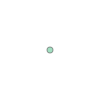

In [15]:
coords = [(0,1)]
point = MultiPoint(coords)
point

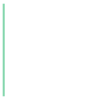

In [16]:
coords = [[(0,1), (0,2)]]
line= MultiLineString(coords)
line

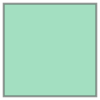

In [12]:
coords = [(1,2), (1,1), (0,1),  (0,2)]
poly = Polygon(coords)
poly

In [13]:
poly.wkt

'POLYGON ((1 2, 1 1, 0 1, 0 2, 1 2))'

In [1]:
import psycopg2

In [4]:
conn = psycopg2.connect(host= '34.171.19.177', 
                              database='lab1', 
                              user='postgres', 
                              password='starman1')
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS table_name;")
cursor.execute("CREATE TABLE table_name(ID VARCHAR, geom GEOMETRY);")
conn.commit()
conn.close()

In [31]:
coords = [(-93.1844384,44.9834832)]
point = MultiPoint(coords)
wkt = point.wkt
conn = psycopg2.connect(host= '34.171.19.177', 
                              database='lab1', 
                              user='postgres', 
                              password='starman1')
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS table_point;")
cursor.execute("CREATE TABLE table_point(ID SERIAL, col1 VARCHAR);")
cursor.execute("SELECT AddGeometryColumn('table_point', 'geom', 4326, 'MULTIPOINT', 2)")
cursor.execute("INSERT INTO table_point(geom) VALUES (" + "ST_GeometryFromText(" + "'" + wkt + "', 4326))")
conn.commit()
conn.close()

In [34]:
coords = [[(-93.1698717, 44.9792762), (-93.1728347, 44.9794954)]]
line = MultiLineString(coords)
wkt = line.wkt
conn = psycopg2.connect(host= '34.171.19.177', 
                              database='lab1', 
                              user='postgres', 
                              password='starman1')
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS table_line;")
cursor.execute("CREATE TABLE table_line(ID SERIAL, col1 VARCHAR);")
cursor.execute("SELECT AddGeometryColumn('table_line', 'geom', 4326, 'MULTILINESTRING', 2)")
cursor.execute("INSERT INTO table_line(geom) VALUES (" + "ST_GeometryFromText(" + "'" + wkt + "', 4326))")
conn.commit()
conn.close()

In [20]:
coords = [(-93.1561248, 45.0077567), (-93.1560998, 45.0072108), (-93.1553152, 45.0071887), (-93.1553136, 45.0077744)]
poly = Polygon(coords)
 
wkt = poly.wkt
conn = psycopg2.connect(host= '34.171.19.177', 
                              database='lab1', 
                              user='postgres', 
                              password='starman1')
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS table_poly;")
cursor.execute("CREATE TABLE table_poly(ID SERIAL, col1 VARCHAR);")
cursor.execute("SELECT AddGeometryColumn('table_poly', 'geom', 4326, 'POLYGON', 2);")
cursor.execute("INSERT INTO table_poly(geom) VALUES (" + "ST_GeometryFromText(" + "'" + wkt + "', 4326));")
conn.commit()
conn.close()

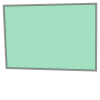

In [21]:
poly